### Global Thresholding

In [2]:
import cv2
import matplotlib.pyplot as plt

**image = cv2.imread('lanus.png')**: Esta línea lee la imagen `lanus.png` usando `cv2.imread()`. OpenCV lee las imágenes en el formato BGR (Blue-Green-Red), que es diferente al formato RGB (Red-Green-Blue) usualmente utilizado en otros sistemas de visualización de imágenes.

**image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)**: Dado que queremos visualizar la imagen con Matplotlib, convertimos el formato de color de BGR a RGB usando `cv2.cvtColor`. Esto permite que la imagen aparezca con los colores correctos en el gráfico.

In [ ]:
image = cv2.imread('lanus.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

**gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)**: La umbralización se suele aplicar a imágenes en escala de grises, ya que facilita la segmentación. Aquí, usamos nuevamente `cv2.cvtColor`, esta vez para convertir la imagen RGB a escala de grises. En una imagen en escala de grises, cada píxel tiene un solo valor de intensidad que va de 0 a 255 (0 es negro y 255 es blanco). Esto reduce la información de color y facilita la segmentación binaria.

`cv2.COLOR_RGB2GRAY` es un **flag o indicador de conversión de color** en OpenCV que le dice a la función `cv2.cvtColor()` que convierta una imagen de **RGB a escala de grises**.

**cv2.COLOR_RGB2GRAY** en `cv2.cvtColor()`:
   - Cuando se utiliza `cv2.COLOR_RGB2GRAY` como argumento en `cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)`, OpenCV convierte cada píxel de la imagen RGB en un solo valor de intensidad de gris.
   - Para esta conversión, OpenCV utiliza una fórmula de ponderación estándar que toma en cuenta cómo el ojo humano percibe cada color (dando más peso al verde, por ejemplo):

     
     Gray = 0.299 x R + 0.587 x G + 0.114 x B
     
   
   - Esta fórmula pondera los canales rojo, verde y azul de cada píxel para obtener una representación en escala de grises que resulta en una imagen más precisa visualmente.

In [4]:
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

- **cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)**: Esta línea aplica el algoritmo de umbralización global. 
    - `gray_image` es la imagen en escala de grises.
    - `127` es el valor de umbral que se usa para decidir si un píxel se convierte en blanco o en negro.
    - `255` es el valor máximo de intensidad que se asigna a los píxeles blancos después de la umbralización.
    - `cv2.THRESH_BINARY` es el tipo de umbralización: convierte píxeles con intensidades mayores al umbral (127) en blancos (255) y los menores o iguales en negros (0).
- **`_, thresholded_image`**: `cv2.threshold` devuelve dos valores:
    - El primer valor es el umbral usado (aquí, 127), que no necesitamos, así que lo ignoramos con `_`.
    - El segundo valor, `thresholded_image`, es la imagen resultante, donde los píxeles han sido transformados a blanco o negro según el umbral.

In [5]:
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

**plt.figure(figsize=(10, 5))**: Se configura la figura de Matplotlib con un tamaño de 10x5 pulgadas, lo que proporciona suficiente espacio para visualizar las dos imágenes (original y umbralizada) una al lado de la otra.

In [6]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

- **plt.subplot(1, 2, 1)**: Crea el primer subplot (1 fila, 2 columnas, primer gráfico) en la figura.
- **plt.imshow(image_rgb)**: Muestra la imagen en formato RGB. Dado que `image_rgb` es la imagen en formato RGB, aparecerá con los colores correctos.
- **plt.title('Imagen Original')**: Añade un título ("Imagen Original") para identificar este subplot.
- **plt.axis('off')**: Oculta los ejes para que no aparezcan marcas ni bordes alrededor de la imagen.

(np.float64(-0.5), np.float64(1018.5), np.float64(684.5), np.float64(-0.5))

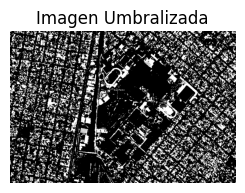

In [7]:
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Imagen Umbralizada')
plt.axis('off')

**plt.show()**: Muestra la figura con ambas imágenes. Esta es la línea final del código, que hace que la figura generada aparezca en pantalla con la imagen original a la izquierda y la imagen umbralizada a la derecha.

In [8]:
plt.show()

### Código completo

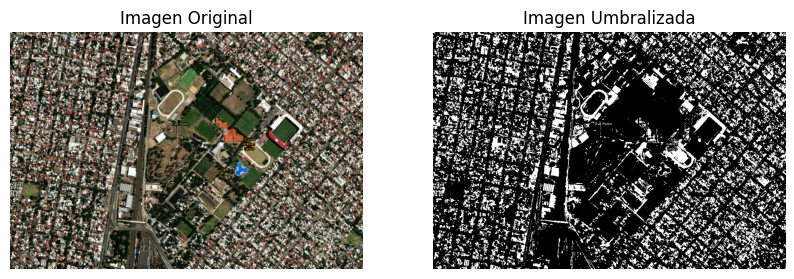

In [9]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen en formato RGB
image = cv2.imread('lanus.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises para aplicar el umbral
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Aplicar un umbral global (por ejemplo, 127) a la imagen en escala de grises
_, thresholded_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# Visualizar la imagen original y la imagen umbralizada
plt.figure(figsize=(10, 5))

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen umbralizada
plt.subplot(1, 2, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Imagen Umbralizada')
plt.axis('off')

plt.show()


### Comparación de umbrales

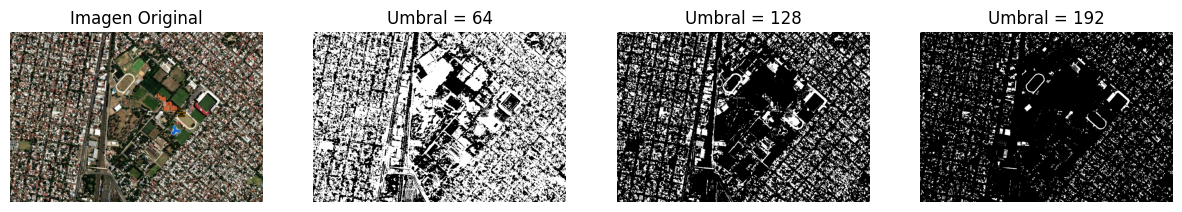

In [10]:
image = cv2.imread('lanus.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Aplicar tres umbrales diferentes
thresholds = [64, 128, 192]
thresholded_images = [cv2.threshold(gray_image, t, 255, cv2.THRESH_BINARY)[1] for t in thresholds]

# Visualizar la imagen original y las imágenes umbralizadas con diferentes valores de threshold
plt.figure(figsize=(15, 5))

# Mostrar la imagen original
plt.subplot(1, 4, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Mostrar las imágenes umbralizadas para cada valor de threshold
for i, (t, th_image) in enumerate(zip(thresholds, thresholded_images), start=2):
    plt.subplot(1, 4, i)
    plt.imshow(th_image, cmap='gray')
    plt.title(f'Umbral = {t}')
    plt.axis('off')

plt.show()


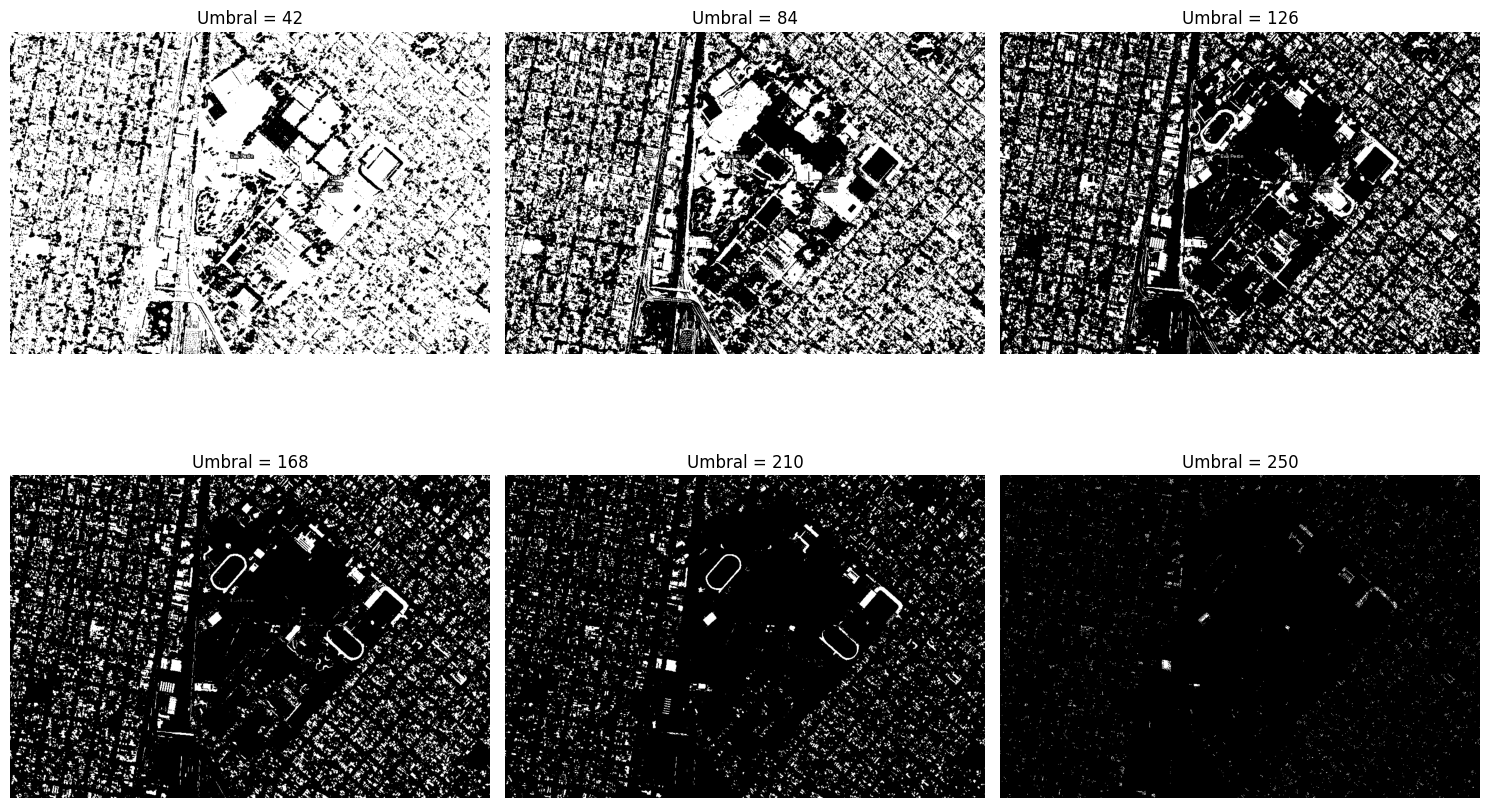

In [11]:
image = cv2.imread('lanus.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Lista de umbrales
thresholds = [42, 84, 126, 168, 210, 250]
thresholded_images = [cv2.threshold(gray_image, t, 255, cv2.THRESH_BINARY)[1] for t in thresholds]

# Visualizar las imágenes umbralizadas con diferentes valores de threshold
plt.figure(figsize=(15, 10))

# Mostrar las imágenes umbralizadas para cada valor de threshold
for i, (t, th_image) in enumerate(zip(thresholds, thresholded_images), start=1):
    plt.subplot(2, 3, i)
    plt.imshow(th_image, cmap='gray')
    plt.title(f'Umbral = {t}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Diferentes Global Thresholds

| Tipo de umbral | Píxel > Umbral           | Píxel <= Umbral |
|----------------|--------------------------|------------------|
| THRESH_BINARY  | maxValue                 | 0               |
| THRESH_BINARY_INV | 0                    | maxValue        |
| THRESH_TRUNC   | threshold                | Sin cambios     |
| THRESH_TOZERO  | Sin cambios              | 0               |
| THRESH_TOZERO_INV | 0                    | Sin cambios     |

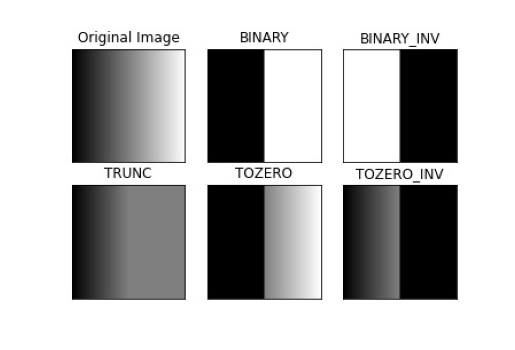

In [17]:
image = cv2.imread('threshold.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')  # Ocultar los ejes
plt.show()


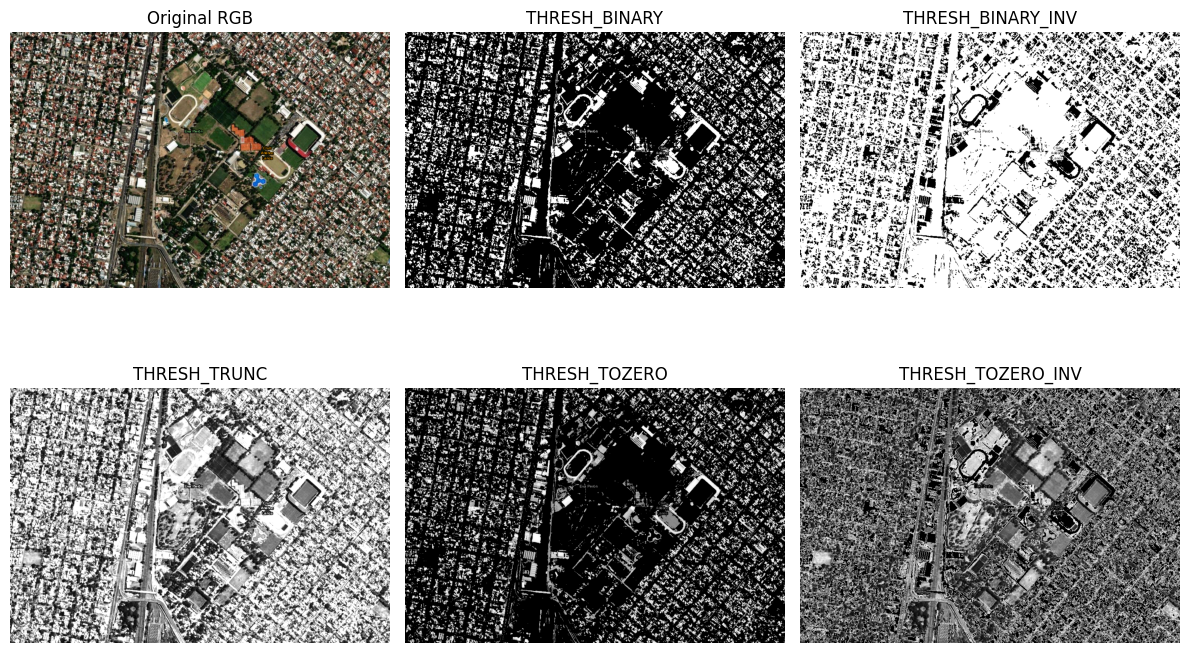

In [16]:
# Cargar la imagen en formato RGB
image = cv2.imread('lanus.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir la imagen a escala de grises para aplicar umbralización
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Aplicar diferentes tipos de umbralización global
_, thresh_binary = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
_, thresh_binary_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_trunc = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TRUNC)
_, thresh_tozero = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO)
_, thresh_tozero_inv = cv2.threshold(gray_image, 127, 255, cv2.THRESH_TOZERO_INV)

# Configuración de la visualización con Matplotlib
titles = ['Original RGB', 'THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TRUNC', 'THRESH_TOZERO', 'THRESH_TOZERO_INV']
images = [image_rgb, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]

# Mostrar las imágenes con sus títulos
plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    if i == 0:
        plt.imshow(images[i])  # Imagen RGB original
    else:
        plt.imshow(images[i], cmap='gray')  # Resultados de umbralización en escala de grises
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


### Contar objetos según los contornos encontrados por el umbral

Número de objetos detectados: 6087


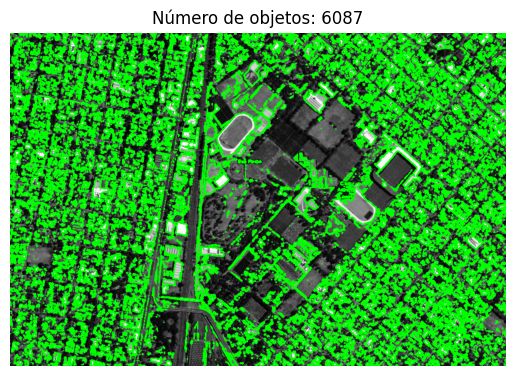

In [14]:
# Cargar la imagen en escala de grises
image = cv2.imread('lanus.png', cv2.IMREAD_GRAYSCALE)

# Aplicar el umbral binario
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Encontrar contornos
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibuja los contornos encontrados en la imagen original
image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Contar los objetos
print(f"Número de objetos detectados: {len(contours)}")

# Mostrar la imagen con contornos
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title(f'Número de objetos: {len(contours)}')
plt.axis('off')
plt.show()
